In [ ]:
import os

os.chdir("D:\ESP_ MACHINE_LEARNING\MACHINE_LEARNING 2\Encuentro_final\yolov5")
!python train.py --img 640 --batch 16 --epochs 25 --data coco.yaml --weights yolov5s.pt --cache


In [ ]:
import cv2
import torch


model = torch.hub.load('ultralytics/yolov5', 'custom', path='D:\ESP_ MACHINE_LEARNING\MACHINE_LEARNING 2\Encuentro_final\yolov5\yolov5s.pt') 

model.eval()

cap = cv2.VideoCapture(0) 

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)


    pred = results.pred[0] 

    for det in pred:
        confidence = det[4].item() 
        if confidence >= 0.5:
            x1, y1, x2, y2 = det[:4].tolist()  
            label = f'{results.names[int(det[5])]} {confidence:.2f}' 

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Detección de objetos', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




![Imagen de WhatsApp 2024-11-13 a las 00.09.30_6b4c9cd2.jpg](<attachment:Imagen de WhatsApp 2024-11-13 a las 00.09.30_6b4c9cd2.jpg>)
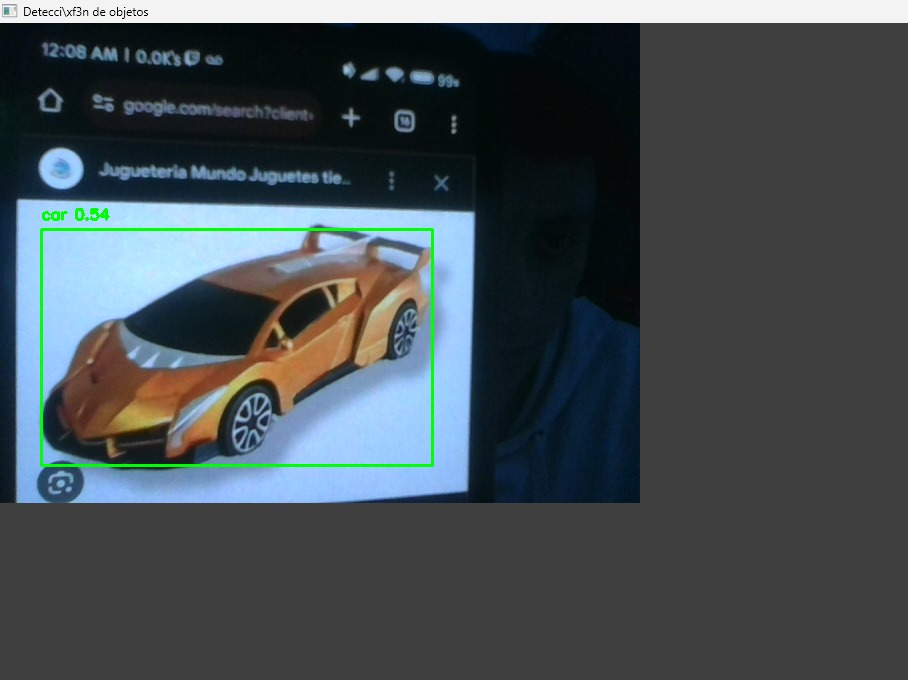